# Pre-processing

# **Importing the necessary libraries and the dataset**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('combined.csv')
df.head()

,Date,Profile URL,First Name,Last Name,Full Name,Location,Job Title,Company Name,Industry,Company Location,...,Profile Headline,Profile Summary,School,Degree,Education Start,Education End,Field of Study,Shared Connections,Degree of Connection,Domain
0,"29/03/2021, 19:22:46",https://www.linkedin.com/in/karteek-pallerla,Karteek,Pallerla (KP),Karteek Pallerla (KP),NaN,Battery Designer,Rivian,Automotive,"Dublin, Ohio, United States",...,"Mechanical Design Engineer, System Integration...",In the ever-growing technological world where ...,Chalmers University of Technology,"Micro Masters MOOC Program ""Emerging Automotiv...",2020.0,2020.0,"(Conventional, Hybrid and Electric Vehicles)",2923,2,Arts and Design
1,"29/03/2021, 19:22:47",https://www.linkedin.com/in/ravitejadupuguntla,Ravi Teja,Dupuguntla,Ravi Teja Dupuguntla,"Jersey City, New Jersey",Digital DevOps Engineer,HSBC,Computer Software,New York City Metropolitan Area,...,Digital DevOps Engineer at HSBC,AWS Certified Cloud Engineer holding 3 AWS Ass...,Binghamton University,Master's degree,2015.0,2017.0,Computer Science,816,2,Arts and Design
2,"29/03/2021, 19:22:48",https://www.linkedin.com/in/aroonmathai,Aroon,Mathai,Aroon Mathai,"Chicago, Illinois, United States",Product Designer,"Two Point Conversions, Inc.",Computer Software,"Chicago, Illinois, United States",...,Leading Product + UX at Remedy (Two Point Conv...,http://aroonmathai.com,Carnegie Mellon University,Master's degree,2017.0,2018.0,Human Computer Interaction,668,2,Arts and Design
3,"29/03/2021, 19:22:48",https://www.linkedin.com/in/shubhanjan-chakrab...,Shubhanjan,Chakrabarty,Shubhanjan Chakrabarty,Bangalore,Product Designer,udaan.com,Information Technology and Services,"Bangalore Urban, Karnataka, India",...,Product Designer at udaan,NaN,Vellore Institute of Technology,Bachelor of Technology,2014.0,2018.0,Information Technology,5367,2,Arts and Design
4,"29/03/2021, 19:22:49",https://www.linkedin.com/in/varsha-agarwal-8a7...,Varsha,Agarwal,Varsha Agarwal,NaN,Digital Technology Intern,GE,Computer & Network Security,"Jaipur, Rajasthan, India",...,Digital Technology Intern at General Electric ...,NaN,Vellore Institute of Technology,Bachelor of Technology - BTech,2017.0,2021.0,Information Technology,1304,2,Arts and Design


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  4910 non-null   object 
 1   Profile URL           4910 non-null   object 
 2   First Name            4834 non-null   object 
 3   Last Name             4833 non-null   object 
 4   Full Name             4834 non-null   object 
 5   Location              3476 non-null   object 
 6   Job Title             4898 non-null   object 
 7   Company Name          4892 non-null   object 
 8   Industry              4900 non-null   object 
 9   Company Location      4910 non-null   object 
 10  Social Handle         326 non-null    object 
 11  Social Network        326 non-null    object 
 12  Websites              676 non-null    object 
 13  New Job (90 Days)     4760 non-null   object 
 14  Current Position      4898 non-null   object 
 15  Job Description      

In [4]:
df1 = df.drop(['Date','Location','Current Position','Job Description','Education Start', 'Profile URL', 'First Name', 'Last Name', 'Full Name', 'Social Handle','Month Started','Shared Connections','Degree of Connection','Social Network','Websites'], axis = 1)
# df1.head()

Job Title              12
Company Name           18
Industry               10
Company Location        0
New Job (90 Days)     150
Year Started           94
Profile Headline       18
Profile Summary      1445
School                252
Degree                194
Education End         238
Field of Study        378
Domain                  0
dtype: int64


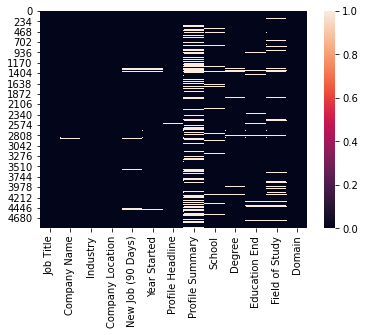

In [5]:
sns.heatmap(df1.isnull())
print(df1.isnull().sum())

# **Checking the number of missing values in each coloum before Pre-processing**

Percentage of missing values :
Job Title             0.244399
Company Name          0.366599
Industry              0.203666
Company Location      0.000000
New Job (90 Days)     3.054990
Year Started          1.914460
Profile Headline      0.366599
Profile Summary      29.429735
School                5.132383
Degree                3.951120
Education End         4.847251
Field of Study        7.698574
Domain                0.000000
dtype: float64


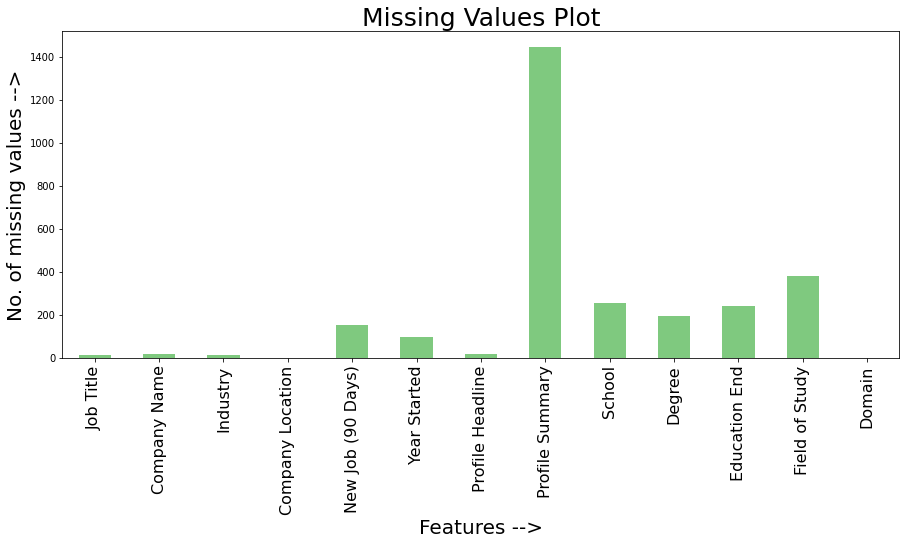

In [6]:
print('Percentage of missing values :')
print(df1.isnull().sum()*100/(df1.notnull().sum()+df1.isnull().sum()))

plt.figure(figsize=(15,6))
df1.isnull().sum().plot(kind='bar', colormap='Accent')
plt.title('Missing Values Plot', fontsize = 25)
plt.xlabel('Features -->', fontsize = 20)
plt.ylabel('No. of missing values -->', fontsize = 20)
plt.xticks(fontsize=16)
plt.show()

# Plotting a TreeMap to understand the hierarchy of jobs in the companies

In [7]:
import plotly.express as px
import numpy as np
import plotly as plt
import ipywidgets as widgets

plt.offline.init_notebook_mode(connected=True)

In [8]:
df1['CompanyName']=df1['Company Name']
df1['JobTitle']=df1['Job Title']
df1.JobTitle = df1['JobTitle'].fillna('not_given')
df1.CompanyName = df1['CompanyName'].fillna('not_given')
df1.Industry = df1.Industry.fillna('not_given')
df1['My Network']='network'

In [9]:
#!pip install --upgrade plotly

In [10]:
# fig1 = px.treemap(df1, path=['My Network', 'Domain', 'Industry'], width=1000, height=1000)
# fig1.show()
# # renderer = "colab"

In [11]:
# fig2 = px.treemap(df1, path=['My Network', 'Domain', 'JobTitle'], width=1000, height=1000)
# fig2.show()

In [12]:
# fig2 = px.treemap(df1, path=['My Network', 'Domain', 'JobTitle'], width=1000, height=1000)
# fig2.show()

# fig3 = px.treemap(df1, path=['My Network', 'Domain', 'CompanyName'], width=1000, height=1000)
# fig3.show()

# **Checking the number of unique values in each coloum before Pre-processing**

Job Title            2194
Company Name         2738
Industry              128
Company Location      657
New Job (90 Days)       2
Year Started           32
Profile Headline     3941
Profile Summary      2968
School                789
Degree                706
Education End          53
Field of Study       1115
Domain                  7
CompanyName          2739
JobTitle             2195
My Network              1
dtype: int64


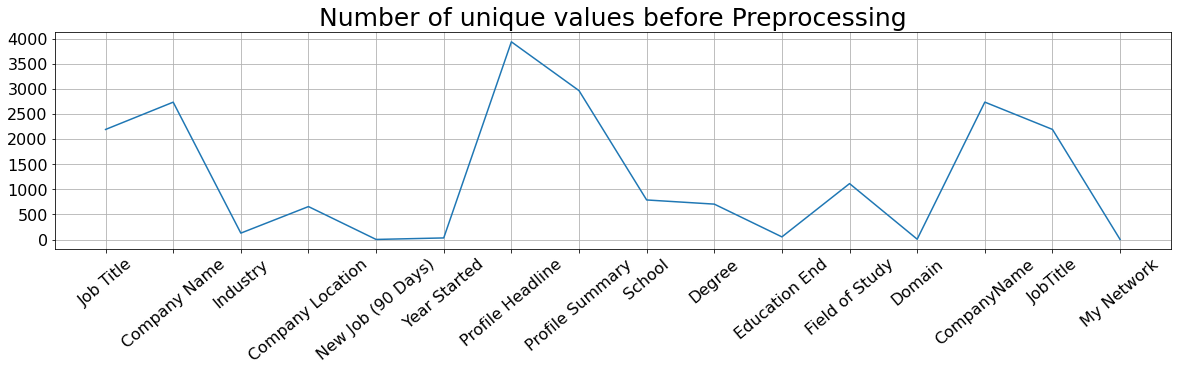

In [13]:
import matplotlib.pyplot as plt

print(df1.nunique())
plt.figure(figsize=(20,4))
plt.plot(df1.nunique())
plt.grid()
plt.title('Number of unique values before Preprocessing', fontsize = 25)
plt.xticks(fontsize=16, rotation=40)
plt.yticks(fontsize=16)
plt.show()

# Preprocessing the Company Locations column

Two steps:
1. Adding a country column using the location column
2. Adding a continent column using the country column created above

**STEP - 1**

In [14]:
df1['Country'] = df1['Company Location']

In [15]:
df1['Country'].replace({'Bengaluru, Karnataka' : 'Bengaluru, India',
              'Greater Bengaluru Area' : 'Greater Bengaluru Area, India',
             'Canada | Netherlands' : 'Canada', 
             'Mumbai, Maharashtra' : 'Mumbai, Maharashtra, India',
             'Pune': 'Pune, India', 
            'Woburn,MA' : 'Woburn, MA, United States', 
            'New York City Metropolitan Area': 'New York, United States',
            'Greater Paris Metropolitan Region' : 'Greater Paris Metropolitan Region, France',
            'Vellore' : 'Vellore, India',
            'Near Kakinada, A.P.': 'Near Kakinada, A.P, India',    
            'Greater Leicester Area': 'Greater Leicester Area, England',       
            'VIT Vellore' : 'VIT Vellore, India',
           'Greater San Diego Area' : 'Greater San Diego Area, India', 
            'Jaipur' : 'Jaipur, India', 
            'CHENNAI' : 'CHENNAI, India',
            'Houston, Texas Area' : 'Houston, Texas Area, United States', 
            'Raleigh-Durham, North Carolina Area' : 'Raleigh-Durham, North Carolina Area, United States',
            'Vellore, Tamil Nadu' : 'Vellore, Tamil Nadu, India',
            'Bangalore - India' : 'Bangalore, India', 
            'pune' : 'pune, India',
            'Ottawa, Canada Area' : 'Ottawa, Canada', 
            'Bangalore' : 'Bangalore, India', 
            'Chennai, Tamil Nadu' : 'Chennai, Tamil Nadu, India',
            'Russelsheim' : 'Russelsheim, Germany',
            'Seattle, Washington' : 'Seattle, Washington, United States', 
           'Tamil Nadu, India and Doha, Qatar' : 'Doha, Qatar', 
            'Kochi,India' : 'Kochi, India',
           'Ghandhinagar' : 'Ghandhinagar, India', 
            'Raipur' : 'Raipur, India', 
            'Tamilnadu' : 'Tamilnadu, India', 
            'VIT Vellore ' : 'VIT Vellore , India',
            'Hyderabad ': 'Hyderabad , India',
            'Hosur' : 'Hosur, India', 
            'Greater New York City Area' : 'Greater New York City Area, United States',
            'New Delhi, Delhi' : 'New Delhi, Delhi, India', 
            'Chennai' : 'Chennai, India', 
            'Hyderabad' : 'Hyderabad, India',
            'Greater Noida' : 'Greater Noida, India', 
            'Richardson,Texas' : 'Richardson, Texas, United States',
            'Chittoor, Andhra Pradesh' : 'Chittoor, Andhra Pradesh, India', 
            'MN,Minnesota' : 'MN, Minnesota, United States',
            'Pantnagar, Uttarakhand' : 'Pantnagar, Uttarakhand, India', 
            'Mumbai' : 'Mumbai, India', 
            'Lyndhurst new jersey': 'Lyndhurst new jersey, United States',
           'Kalpakkam, Chennai' : 'Kalpakkam, Chennai, India',
           'Surajpur noida' : 'Surajpur noida, India', 
            'Wixom, MI' : 'Wixom, MI, United States', 
            'Jacksonville, Florida Area' : 'Jacksonville, Florida Area, United States',
            'San Francisco Bay Area' : 'San Francisco Bay Area, United States',
            'Greater Seattle Area' : 'Greater Seattle Area, United States',
            'Greater Sydney Area' : 'Greater Sydney Area, United States',
            'Greater Houston' : 'Greater Houston, United States',
            'Greater Chicago Area' : 'Greater Chicago Area, United States',
            'Dallas-Fort Worth Metroplex' : 'Dallas-Fort Worth Metroplex, United States',
            'Charlotte Metro' : 'Charlotte Metro, United States',
            'Greater Cambridge Area' : 'Greater Cambridge Area, England',
            'Other' : 'India',
            'Greater Delhi Area' : 'Greater Delhi Area, India',
            'Greater Chennai Area' : 'Greater Chennai Area, India',
            'Greater Hyderabad Area' : 'Greater Hyderabad Area, India',
            'San Francisco Bay Area' : 'San Francisco Bay Area, United States',
            'Greater Reading Area' : 'Greater Reading Area, United Kingdom',
            'Boise Metropolitan Area' : 'Boise Metropolitan Area, United States',
            'Berlin Metropolitan Area' : 'Berlin Metropolitan Area, Germany',
            'Brabantine City Row' : 'Brabantine City Row, Netherlands',
            'Pune/Pimpri-Chinchwad Area' : 'Pune/Pimpri-Chinchwad Area, India',
            'Greater Coventry Area' : 'Greater Coventry Area, England',
            'Greater Sacramento' : 'Greater Sacramento, United States',
            'Hong Kong SAR' : 'Hong Kong',
            'Geneva Metropolitan Area' : 'Geneva Metropolitan Area, Switzerland',
            'Greater Boston' : 'Greater Boston, United States',
            'Greater Indore Area' : 'Greater Indore Area, India',
            'Detroit Metropolitan Area' : 'Detroit Metropolitan Area, United States',
            'Greater Montreal Metropolitan Area' : 'Greater Montreal Metropolitan Area, Canada',
            'Greater Tuscaloosa Area' : 'Greater Tuscaloosa Area, United States',
            'Greater Melbourne Area' : 'Greater Melbourne Area, Australia',
            'Gothenburg Metropolitan Area' : 'Gothenburg Metropolitan Area, Sweden',
            'Greater Brisbane Area' : 'Greater Brisbane Area, Australia',
            'Greater Dublin' : 'Greater Dublin, Ireland',
            'Greater Allahabad Area' : 'Greater Allahabad Area, India',
            'Greater Perth Area' : 'Greater Perth Area, Australia',
            'Greater Hamburg Area' : 'Greater Hamburg Area, Germany',
            'Mumbai Metropolitan Region' : 'Mumbai Metropolitan Region, India',
            'Los Angeles Metropolitan Area' : 'Los Angeles Metropolitan Area, India',
            'Greater Vancouver Metropolitan Area' : 'Greater Vancouver Metropolitan Area, Canada',
            'Greater Adelaide Area' : 'Greater Adelaide Area, Australia',
            'Greater Kassel Area' : 'Greater Kassel Area, Germany',
            'Greater Barcelona Metropolitan Area' : 'Greater Barcelona Metropolitan Area, Spain',
            'Da Nang Metropolitan Area' : 'Da Nang Metropolitan Area, Central Vietnam',
            'Greater Lille Metropolitan Area' : 'Greater Lille Metropolitan Area, France',
            'Texas Metropolitan Area' : ' Texas Metropolitan Area, United States',   
            'Greater Toulouse Metropolitan Area' : 'Greater Toulouse Metropolitan Area, France',
            'Johannesburg Metropolitan Area' : 'Johannesburg Metropolitan Area, South Africa',
            'Cincinnati Metropolitan Area' : 'Cincinnati Metropolitan Area, United States',
            ' South Carolina Area' : 'South Carolina Area, United states',
            'Stockholm Metropolitan Area' : 'Stockholm Metropolitan Area, Sweden',
            'Oregon Metropolitan Area' : ' Oregon Metropolitan Area, United States',
            'Greater Kolkata Area' : 'Greater Kolkata Area, India', 
            'Greater Syracuse-Auburn Area' : 'Greater Syracuse-Auburn Area, United States',
            'Greater Madrid Metropolitan Area' : 'Greater Madrid Metropolitan Area, Spain',
            'Greater Newcastle Area' : 'Greater Newcastle Area, England',
            'Cork Metropolitan Area' : 'Cork Metropolitan Area, Ireland',
            'Helsinki Metropolitan Area' : 'Helsinki Metropolitan Area, Finland',
            'Atlanta Metropolitan Area' : 'Atlanta Metropolitan Area, United States',
            'Ghent Metropolitan Area' : 'Ghent Metropolitan Area, Belgium',
            'Washington DC-Baltimore Area' : 'Washington DC-Baltimore Area, United States',
            'Greater Tampa Bay Area' : 'Greater Tampa Bay Area, United States',
            'New York Metropolitan Area' : ' New York Metropolitan Area, United States',
            'Greater Orlando' : 'Greater Orlando, Florida', 
            'Greater Minneapolis-St. Paul Area' : 'Greater Minneapolis-St. Paul Area, United States', 
           'Greater Munich Metropolitan Area' : 'Greater Munich Metropolitan Area, Germany',
            'Stuttgart Region' : 'Stuttgart Region, Germany',
            'Brussels Metropolitan Area' : 'Brussels Metropolitan Area, Belgium',
           'Greater St. Louis' : 'Greater St. Louis, United States',
            'Greater Hartford' : 'Greater Hartford, United States',
            'Greater Edmonton Metropolitan Area' : 'Greater Edmonton Metropolitan Area, Canada',
            'Frankfurt Rhine-Main Metropolitan Area' : 'Frankfurt Rhine-Main Metropolitan Area, Germany',
           'Greater Indianapolis' : 'Greater Indianapolis, United States',
            'Denver Metropolitan Area' : 'Denver Metropolitan Area, United States',
            'Greater Bordeaux Metropolitan Area' : 'Greater Bordeaux Metropolitan Area, France',
            'Congo (DRC)' : 'Republic of the Congo',
          'Greater Milwaukee' : 'Greater Milwaukee, United States',
          'Austin, Texas Metropolitan Area' : 'Austin, Texas Metropolitan Area, United States',
          'Greater Pittsburgh Region' : 'Greater Pittsburgh Region, United States',
          'Antwerp Metropolitan Area' : 'Belgium',
          'Urbana-Champaign Area' : 'Urbana-Champaign Area, United States',
          'Rochester, New York Metropolitan Area' : 'Rochester, New York Metropolitan Area, United States',
          'Greenville-Spartanburg-Anderson, South Carolina Area' : 'Greenville-Spartanburg-Anderson, South Carolina Area, United States',
          'Portland, Oregon Metropolitan Area' : 'Portland, Oregon Metropolitan Area, United States',
          'San Antonio, Texas Metropolitan Area' : 'San Antonio, Texas Metropolitan Area, United States',
         'kanchipuram': 'kanchipuram, India'}, inplace = True)

In [16]:
countries = []
for index, loc in enumerate(df1['Country']):
    if type(loc) != float:
        country = loc.strip().split(',')[-1]  
        country = country.rstrip().lstrip() 
        countries.append(country)   
    else:
        countries.append("not-given")
    
df1['Country'] = countries

In [17]:
df1['Country'].unique()

array(['United States', 'India', 'Denmark', 'England', 'France',
       'United Arab Emirates', 'United Kingdom', 'Switzerland', 'Germany',
       'Australia', 'Nepal', 'Netherlands', 'Canada', 'Bangladesh',
       'Taiwan', 'Kuwait', 'Singapore', 'Ireland', 'Sweden', 'China',
       'Saudi Arabia', 'Brazil', 'Fiji', 'Hong Kong', 'Uganda',
       'Indonesia', 'Qatar', 'Finland', 'Oman', 'Nigeria', 'New Zealand',
       'Bahrain', 'Belgium', 'Italy', 'Spain', 'Central Vietnam', 'Japan',
       'Malaysia', 'Kenya', 'Thailand', 'South Africa', 'Florida',
       'Norway', 'Luxembourg', 'Mexico', 'Unknown',
       'Republic of the Congo'], dtype=object)

In [18]:
print("Number of unique countries of country locations: ", df1['Country'].nunique())

Number of unique countries of country locations:  47


In [19]:
df1['Country'].value_counts(dropna = False)

India                    3913
United States             420
Canada                     77
United Arab Emirates       75
Australia                  75
Germany                    46
United Kingdom             46
France                     26
Netherlands                25
China                      23
Singapore                  22
Sweden                     17
Qatar                      15
Saudi Arabia               13
New Zealand                10
Ireland                    10
Nepal                       8
Belgium                     7
Oman                        6
Denmark                     5
Malaysia                    5
Finland                     5
Kuwait                      5
Spain                       5
England                     4
Switzerland                 4
Bahrain                     4
Taiwan                      3
Italy                       3
Japan                       3
Hong Kong                   3
Norway                      3
Central Vietnam             3
Fiji      

STEP - 2

In [20]:
df1['Continent'] = df1['Country']

In [21]:
# !pip install pycountry_convert

In [22]:
import pycountry_convert as pc
import pycountry

input_countries = df1['Country'].tolist()

In [23]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2
continents = []
codes = [countries.get(country, 'Unknown code') for country in input_countries]
for code in codes:
    if code != 'Unknown code':
        continents.append(pc.country_alpha2_to_continent_code(code)) 
    else:
        continents.append('unknown')

# print(continents)
df1['Continent'] = continents

In [24]:
df1['Continent'].unique()

array(['NA', 'AS', 'EU', 'unknown', 'OC', 'SA', 'AF'], dtype=object)

# Plotting sunbursts to visualise the distribution of companies distributed over continents

In [25]:
fig4 = px.sunburst(df1, path=['Continent', 'Country'])
fig4.show()

# **Pre-processing the Job Title coloum**

In [26]:
df1['Job Title'].value_counts(dropna=False)

Project Manager                      348
Product Manager                      217
Analyst                              213
Program Manager                      113
Account Manager                       66
                                    ... 
Trainee decision scientist             1
entertainers and event management      1
Internet of Things Intern              1
Operations Executive                   1
Associate Video Producer               1
Name: Job Title, Length: 2195, dtype: int64

In [27]:
df['Job Title'].describe()

count                4898
unique               2194
top       Project Manager
freq                  348
Name: Job Title, dtype: object

In [28]:
df['Job Title'].value_counts()

Project Manager                      348
Product Manager                      217
Analyst                              213
Program Manager                      113
Account Manager                       66
                                    ... 
Trainee decision scientist             1
entertainers and event management      1
Internet of Things Intern              1
Operations Executive                   1
Junior Analyst 2                       1
Name: Job Title, Length: 2194, dtype: int64

In [29]:
df1['Job Title'].unique()

array(['Battery Designer', 'Digital DevOps Engineer', 'Product Designer',
       ..., 'Product Manager Haematology', 'Principal Product Manager',
       'Product Technical Manager at Infosys'], dtype=object)

In [30]:
df1['JobTitle']=df1['Job Title']
df1['JobTitle'] = df1['JobTitle'].str.replace('[^\w\s]','')
df1['JobTitle']=df1['JobTitle'].str.lower()
df1['JobTitle']=df1['JobTitle'].str.replace(' ','')

df1.JobTitle = df1.JobTitle.fillna('not_given')

In [31]:
df1.loc[df1.JobTitle.str.contains('manage'), 'JobTitle'] = 'Manager'
df1.loc[df1.JobTitle.str.contains('analys'), 'JobTitle'] = 'Analyst'
df1.loc[df1.JobTitle.str.contains('developer'), 'JobTitle'] = 'Developer'
df1.loc[df1.JobTitle.str.contains('web'), 'JobTitle'] = 'Developer'
df1.loc[df1.JobTitle.str.contains('designer'), 'JobTitle'] = 'Designer'
df1.loc[df1.JobTitle.str.contains('dev'), 'JobTitle'] = 'developer'
df1.loc[df1.JobTitle.str.contains('founder'), 'JobTitle'] = 'Founder'
df1.loc[df1.JobTitle.str.contains('owner'), 'JobTitle'] = 'Founder'
df1.loc[df1.JobTitle.str.contains('intern'), 'JobTitle'] = 'Intern'
df1.loc[df1.JobTitle.str.contains('freelance'), 'JobTitle'] = 'freelancer'
df1.loc[df1.JobTitle.str.contains('associate'), 'JobTitle'] = 'Associate'
df1.loc[df1.JobTitle.str.contains('president'), 'JobTitle'] = 'Board Member'
df1.loc[df1.JobTitle.str.contains('vice'), 'JobTitle'] = 'Board Member'
df1.loc[df1.JobTitle.str.contains('ceo'), 'JobTitle'] = 'Board Member'
df1.loc[df1.JobTitle.str.contains('director'), 'JobTitle'] = 'Board Member'
df1.loc[df1.JobTitle.str.contains('board'), 'JobTitle'] = 'Board Member'
df1.loc[df1.JobTitle.str.contains('engineer'), 'JobTitle'] = 'Engineer'
df1.loc[df1.JobTitle.str.contains('chair'), 'JobTitle'] = 'Board Member'
df1.loc[df1.JobTitle.str.contains('professor'), 'JobTitle'] = 'Professor'
df1.loc[df1.JobTitle.str.contains('officer'), 'JobTitle'] = 'Officer'
df1.loc[df1.JobTitle.str.contains('blogger'), 'JobTitle'] = 'Blogger'
df1.loc[df1.JobTitle.str.contains('scientist'), 'JobTitle'] = 'Research Scientist'
df1.loc[df1.JobTitle.str.contains('research'), 'JobTitle'] = 'PhD Student'
df1.loc[df1.JobTitle.str.contains('phd'), 'JobTitle'] = 'PhD Student'
df1.loc[df1.JobTitle.str.contains('thesis'), 'JobTitle'] = 'PhD Student'
df1.loc[df1.JobTitle.str.contains('core'), 'JobTitle'] = 'Commitee Member'
df1.loc[df1.JobTitle.str.contains('member'), 'JobTitle'] = 'Commitee Member'
df1.loc[df1.JobTitle.str.contains('head'), 'JobTitle'] = 'Team Leader'
df1.loc[df1.JobTitle.str.contains('lead'), 'JobTitle'] = 'Team Leader'
df1.loc[df1.JobTitle.str.contains('admin'), 'JobTitle'] = 'Team Leader'
df1.loc[df1.JobTitle.str.contains('sales'), 'JobTitle'] = 'Sales Representative'
df1.loc[df1.JobTitle.str.contains('market'), 'JobTitle'] = 'Marketing'
df1.loc[df1.JobTitle.str.contains('specialist'), 'JobTitle'] = 'Specialist'
df1.loc[df1.JobTitle.str.contains('edit'), 'JobTitle'] = 'Editor'
df1.loc[df1.JobTitle.str.contains('ambassador'), 'JobTitle'] = 'Product ambassador'
df1.loc[df1.JobTitle.str.contains('campus'), 'JobTitle'] = 'Product ambassador'
df1.loc[df1.JobTitle.str.contains('grapher'), 'JobTitle'] = 'Photographer'
df1.loc[df1.JobTitle.str.contains('assistant'), 'JobTitle'] = 'Assistant'
df1.loc[df1.JobTitle.str.contains('archi'), 'JobTitle'] = 'Architect'
df1.loc[df1.JobTitle.str.contains('creator'), 'JobTitle'] = 'Content Creator'
df1.loc[df1.JobTitle.str.contains('content'), 'JobTitle'] = 'Content Creator'
df1.loc[df1.JobTitle.str.contains('desi'), 'JobTitle'] = 'Product Designer'
df1.loc[df1.JobTitle.str.contains('test'), 'JobTitle'] = 'Sofware tester'
df1.loc[df1.JobTitle.str.contains('rep'), 'JobTitle'] = 'Product Representative'
df1.loc[df1.JobTitle.str.contains('art'), 'JobTitle'] = 'Artist'
df1.loc[df1.JobTitle.str.contains('volunteer'), 'JobTitle'] = 'Volunteer'
df1.loc[df1.JobTitle.str.contains('coordinator'), 'JobTitle'] = 'Coordinator'
df1.loc[df1.JobTitle.str.contains('consult'), 'JobTitle'] = 'Consultant'
df1.loc[df1.JobTitle.str.contains('advi'), 'JobTitle'] = 'Advisor'
df1.loc[df1.JobTitle.str.contains('writ'), 'JobTitle'] = 'Writer'
df1.loc[df1.JobTitle.str.contains('read'), 'JobTitle'] = 'Writer'
df1.loc[df1.JobTitle.str.contains('grow'), 'JobTitle'] = 'Growth Hacker'
df1.loc[df1.JobTitle.str.contains('youtube'), 'JobTitle'] = 'Youtuber'
df1.loc[df1.JobTitle.str.contains('compos'), 'JobTitle'] = 'Composer'
df1.loc[df1.JobTitle.str.contains('executive'), 'JobTitle'] = 'Executive'
df1.loc[df1.JobTitle.str.contains('solution'), 'JobTitle'] = 'Solution Expert'
df1.loc[df1.JobTitle.str.contains('expert'), 'JobTitle'] = 'Product Expert'
df1.loc[df1.JobTitle.str.contains('actor'), 'JobTitle'] = 'Actor'
df1.loc[df1.JobTitle.str.contains('review'), 'JobTitle'] = 'Reviewer'
df1.loc[df1.JobTitle.str.contains('organize'), 'JobTitle'] = 'Organizer'
df1.loc[df1.JobTitle.str.contains('agent'), 'JobTitle'] = 'Product Agent'
df1.loc[df1.JobTitle.str.contains('promot'), 'JobTitle'] = 'Promoter'
df1.loc[df1.JobTitle.str.contains('student'), 'JobTitle'] = 'Student'
df1.loc[df1.JobTitle.str.contains('communicat'), 'JobTitle'] = 'Communicator'
df1.loc[df1.JobTitle.str.contains('business'), 'JobTitle'] = 'Business Stratergy'
df1.loc[df1.JobTitle.str.contains('retail'), 'JobTitle'] = 'Retailer'
df1.loc[df1.JobTitle.str.contains('public'), 'JobTitle'] = 'Public Relations'
df1.loc[df1.JobTitle.str.contains('secret'), 'JobTitle'] = 'Secretary'
df1.loc[df1.JobTitle.str.contains('trainee'), 'JobTitle'] = 'Trainee'
df1.loc[df1.JobTitle.str.contains('control'), 'JobTitle'] = 'Project Control'
df1.loc[df1.JobTitle.str.contains('project'), 'JobTitle'] = 'Project Control'
df1.loc[df1.JobTitle.str.contains('operat'), 'JobTitle'] = 'Operations'
df1.loc[df1.JobTitle.str.contains('transla'), 'JobTitle'] = 'Translator'
df1.loc[df1.JobTitle.str.contains('tutor'), 'JobTitle'] = 'Tutor'
df1.loc[df1.JobTitle.str.contains('tutor'), 'JobTitle'] = 'Trainer'
df1.loc[df1.JobTitle.str.contains('instruct'), 'JobTitle'] = 'Trainer'
df1.loc[df1.JobTitle.str.contains('media'), 'JobTitle'] = 'Media'

In [32]:
print("Number of unique Job Titles: ", df1['JobTitle'].nunique())

Number of unique Job Titles:  177


# **Pre-processing the Industry coloum**

In [33]:
df1['Industry'].value_counts(dropna=False)

Information Technology and Services    785
Computer Software                      554
Internet                               181
Financial Services                     179
Management Consulting                  178
                                      ... 
Fine Art                                 1
Wireless                                 1
Executive Office                         1
Wine and Spirits                         1
Warehousing                              1
Name: Industry, Length: 128, dtype: int64

In [34]:
df1['Industry'].replace({'Higher Education':'Primary/Secondary Education',
                         'Medical Practice':'Hospital & Health Care',
                         'Mental Health Care':'Hospital & Health Care',
                         'Health, Wellness and Fitness':'Hospital & Health Care',
                         'Medical Devices':'Hospital & Health Care',
                         'Pharmaceuticals':'Hospital & Health Care',
                         'Veterinary':'Hospital & Health Care',
                         'Computer Software':'Information Technology and Services',
                         'Wireless':'Information Technology and Services',
                         'Computer Games':'Information Technology and Services',
                         'Information Services':'Information Technology and Services',
                         'Computer & Network Security':'Information Technology and Services',
                         'Computer Networking':'Information Technology and Services',
                         'Internet':'Information Technology and Services',
                         'Automotive':'Mechanical or Industrial Engineering',
                         'Construction':'Civil Engineering',
                         'Building Materials':'Civil Engineering',
                         'Railroad Manufacture':'Civil Engineering',
                         'Investment Banking':'Banking',
                         'Online Media':'Media Production',
                         'Broadcast Media':'Media Production',
                         'Food & Beverages':'Consumer Goods',
                         'Restaurants':'Consumer Goods',
                         'Wine and Spirits':'Consumer Goods',
                         'Oil & Energy':'Consumer Goods',
                         'Chemicals':'Consumer Goods',
                         'Insurance':'Consumer Services',
                         'Hospitality':'Consumer Services',
                         'Telecommunications':'Consumer Services',
                         'Arts and Crafts':'Consumer Goods',
                         'Newspapers':'Consumer Goods',
                         'Plastics':'Consumer Goods',
                         'Fine Art':'Consumer Goods',
                         'Wholesale':'Consumer Goods',
                         'Paper & Forest Products':'Consumer Goods',
                         'Textiles':'Consumer Goods',
                         'Food Production':'Consumer Goods',
                         'Luxury Goods & Jewelry':'Consumer Goods',
                         'Consumer Electronics':'Consumer Goods',
                         'Staffing and Recruiting':'Consumer Services',
                         'Environmental Services':'Consumer Services',
                         'Financial Services':'Consumer Services',
                         'Events Services':'Consumer Services',
                         'Legal Services':'Consumer Services',
                         'Individual & Family Services':'Consumer Services',
                         'Facilities Services':'Consumer Services',
                         'Supermarkets':'Consumer Goods',
                         'Retail':'Consumer Goods',
                         'Package/Freight Delivery':'Consumer Services',
                         'Import and Export':'International Trade and Development',
                         'International Affairs':'International Trade and Development',
                         'Outsourcing/Offshoring':'International Trade and Development',
                         'Transportation/Trucking/Railroad':'Logistics and Supply Chain',
                         'Leisure, Travel & Tourism':'Logistics and Supply Chain',
                         'Writing and Editing':'Publishing',
                         'Music':'Entertainment',
                         'Animation':'Entertainment',
                         'Media Production':'Entertainment',
                         'Photography':'Entertainment',
                         'Philanthropy':'Nonprofit Organization Management',
                         'Market Research':'Research',
                         'Think Tanks':'Research',
                         'Computer Hardware':'Consumer Goods',
                         'Apparel & Fashion':'Consumer Goods',
                         'Semiconductors':'Consumer Goods',
                         'Cosmetics':'Consumer Goods',
                         'Packaging and Containers':'Consumer Services',
                         'Public Relations and Communications':'Consumer Services',
                         'Printing':'Consumer Services',
                         'Glass, Ceramics & Concrete':'Consumer Goods',
                         'Machinery':'Consumer Goods',
                         'Utilities':'Consumer Goods',
                         'Shipbuilding':'Consumer Services',
                         'Banking':'Consumer Services',
                         'Motion Pictures and Film':'Entertainment',
                         'Accounting':'Consumer Services',
                         'Human Resources':'Consumer Services',
                         'Translation and Localization':'Consumer Services',
                         'Publishing':'Consumer Services',
                         'Professional Training & Coaching':'Consumer Services',
                         'Program Development':'Consumer Services'

                        },inplace = True)

In [35]:
df1['Industry'].unique()

array(['Mechanical or Industrial Engineering',
       'Information Technology and Services', 'Consumer Goods',
       'Consumer Services', 'Hospital & Health Care', 'Design',
       'Management Consulting', 'Entertainment',
       'Electrical/Electronic Manufacturing', 'Civil Engineering',
       'Education Management', 'Industrial Automation',
       'Primary/Secondary Education', 'Aviation & Aerospace', 'Research',
       'Nonprofit Organization Management', 'Publishing',
       'Marketing and Advertising', 'Real Estate', 'Graphic Design',
       'International Trade and Development', 'Renewables & Environment',
       'Law Practice', 'Biotechnology', 'E-Learning',
       'Architecture & Planning', 'Sports',
       'Venture Capital & Private Equity', 'Logistics and Supply Chain',
       'not_given', 'Public Safety', 'Mining & Metals',
       'Civic & Social Organization', 'Airlines/Aviation',
       'Security and Investigations', 'Media Production',
       'Business Supplies and Equi

In [36]:
df1['Industry'].value_counts()[0:50]

Information Technology and Services     1617
Consumer Services                        481
Consumer Goods                           433
Mechanical or Industrial Engineering     296
Management Consulting                    178
Nonprofit Organization Management        178
Marketing and Advertising                175
Hospital & Health Care                   159
Electrical/Electronic Manufacturing      136
Entertainment                            124
Civil Engineering                        124
Education Management                     122
Biotechnology                            102
E-Learning                                93
Research                                  92
Design                                    85
Primary/Secondary Education               74
Publishing                                57
Logistics and Supply Chain                54
Aviation & Aerospace                      41
Industrial Automation                     36
Media Production                          28
Graphic De

In [37]:
df1['Industry'].describe()

count                                    4910
unique                                     50
top       Information Technology and Services
freq                                     1617
Name: Industry, dtype: object

In [38]:
print("Number of unique Industries: ", df1['Industry'].nunique())

Number of unique Industries:  50


# **Preprocessing the Degree Column**

In [39]:
df1['Degree'] = df1['Degree'].str.replace('[^\w\s]','')
df1['Degree']=df1['Degree'].str.lower()
df1['Degree']=df1['Degree'].str.replace(' ','')

df1.Degree = df1.Degree.fillna('not_given')

In [40]:
df1.loc[df1.Degree.str.contains('null'), 'Degree'] = 'null'
df1.loc[df1.Degree.str.contains('bachelor'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('under'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('be'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('btec'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('bachlors'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('engineer'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('bc'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('mtech'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('master'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('mca'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('mba'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('business'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('management'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('post'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('ms'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('ma'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('pg'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('mdes'), 'Degree'] = 'pg'
df1.loc[df1.Degree.str.contains('doctor'), 'Degree'] = 'phd'
df1.loc[df1.Degree.str.contains('research'), 'Degree'] = 'phd'
df1.loc[df1.Degree.str.contains('phd'), 'Degree'] = 'phd'
df1.loc[df1.Degree.str.contains('bs'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('school'), 'Degree'] = 'school'
df1.loc[df1.Degree.str.contains('high'), 'Degree'] = 'school'
df1.loc[df1.Degree.str.contains('ba'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('graduate'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('cs'), 'Degree'] = 'ug'
df1.loc[df1.Degree.str.contains('mechanical'), 'Degree'] = 'ug'

df1['Degree'] = df1['Degree'].str.replace('ugprofessionalyearug', 'ug')

df1['Degree'].replace({'byech':'ug','executiveeducation':'pg','me':'pg','sslc':'school','hsc':'school',
                       'preuniversity':'school','10thboards':'school','intermediate':'school','puc':'school',
                       'student':'school','12th':'school','preuniversitycource':'school','mechanialengg':'ug',
                       'ece':'ug','grduate':'ug','thesis':'phd','llicenciatura':'other', 'year':'other',
                       'pncandkrdegreecollege':'ug', 'arts':'ug',
       'onlinesaleinindia':'other', 
       'certificateprogramme':'other',
       'financialmodellingandvaluation':'other', 
       '2styear':'other', 'vitvellore':'ug',
       'professionaldegreecertificate':'other',
        'valuenagotiation':'other', 'idp':'other',
       'contractlaw':'ug', 'projectstudent':'other',
       'projectplanninganalysisandcontrol':'other', 
        'ee':'other', 'dme':'other', 'pmpusa':'other', 'aws':'other',
       'ocw':'other', 'accountingfundamental':'other', 'extensionstudies':'other', 'mism':'other', 'mmm':'pg',
       'gniit':'ug', '学士':'other',
        'bt':'other', 'dece':'ug', 'diplomo':'ug', 'amie':'other', 'biotech':'ug', 'deee':'ug',
       'presidencycollegeofchennai':'ug', 'commerce':'ug', 'fellowshipprogram':'phd',
       'innovationandentrepreneurship':'other', 'onlinecourse':'other', 'no':'other',
       'associateofscienceas':'ug', 'inprocess':'other',
       'mobileapplicationdevelopment':'other',
       'chineseenglishtranslatorinchennai09910713101':'other', 'grandeécole':'other',
       'craftingcreativecommunication':'other', 'documentaryproduction':'other',
       'computerscience':'ug', 'nanodegree':'pg', 'diplômeetudiantentrepreneur':'ug'
        'professionalyear''ug',
       'advancedjavaframeworks':'other', 'chefdeprojetmultimedia':'other',
       'intermediatescience':'pg', 'mphil':'pg', 'cqfcertification':'other', 'dhmct':'ug',
       'certificationingamedesigining':'other', 'licencedinsuranceagent':'other','aecprogram':'ug',
                       'professionalyear':'pg','ugprofessionalyearug':'ug'},inplace=True)

In [41]:
df1['Degree'].unique()

array(['pg', 'ug', 'not_given', 'phd', 'other', 'school',
       'ugprofessionalyearug'], dtype=object)

In [42]:
df1['Degree'].value_counts(dropna=False)

ug                      2660
pg                      1918
not_given                194
phd                       78
other                     39
school                    20
ugprofessionalyearug       1
Name: Degree, dtype: int64

In [43]:
print("Number of unique Degree: ", df1['Degree'].nunique())

Number of unique Degree:  7


# Preprocessing the Field of Study Column

In [44]:
df1['FieldOfStudy']=df1['Field of Study']
df1['FieldOfStudy'].value_counts()

Computer Science                                                            661
Mechanical Engineering                                                      371
Information Technology                                                      206
Electrical, Electronics and Communications Engineering                      193
Electrical and Electronics Engineering                                      180
                                                                           ... 
Digital Game Design                                                           1
Mechanical engineering with specialization in energy engineering              1
Computer Science Engineering with Specialization in Information Security      1
Electronics and Communication with specialisation in IOT and Sensors          1
Applied Biology                                                               1
Name: FieldOfStudy, Length: 1115, dtype: int64

In [45]:
df1['FieldOfStudy'] = df1['FieldOfStudy'].str.replace('[^\w\s]','')
df1['FieldOfStudy']=df1['FieldOfStudy'].str.lower()
df1['FieldOfStudy']=df1['FieldOfStudy'].str.replace(' ','')

df1.FieldOfStudy = df1.FieldOfStudy.fillna('not_given')

In [46]:
df1.loc[df1.FieldOfStudy.str.contains('computer'), 'FieldOfStudy'] = 'Computer Science'
df1.loc[df1.FieldOfStudy.str.contains('security'), 'FieldOfStudy'] = 'Computer Science'
df1.loc[df1.FieldOfStudy.str.contains('data'), 'FieldOfStudy'] = 'Computer Science'
df1.loc[df1.FieldOfStudy.str.contains('artificial'), 'FieldOfStudy'] = 'Computer Science'
df1.loc[df1.FieldOfStudy.str.contains('cse'), 'FieldOfStudy'] = 'Computer Science'
df1.loc[df1.FieldOfStudy.str.contains('information'), 'FieldOfStudy'] = 'Computer Science'
df1.loc[df1.FieldOfStudy.str.contains('network'), 'FieldOfStudy'] = 'Computer Science'
df1.loc[df1.FieldOfStudy.str.contains('electric'), 'FieldOfStudy'] = 'Electrical, Electronics and Communication Engineering'
df1.loc[df1.FieldOfStudy.str.contains('software'), 'FieldOfStudy'] = 'Computer Science'
df1.loc[df1.FieldOfStudy.str.contains('electronics'), 'FieldOfStudy'] = 'Electrical, Electronics and Communication Engineering'
df1.loc[df1.FieldOfStudy.str.contains('communica'), 'FieldOfStudy'] = 'Electrical, Electronics and Communication Engineering'
df1.loc[df1.FieldOfStudy.str.contains('ece'), 'FieldOfStudy'] = 'Electrical, Electronics and Communication Engineering'
df1.loc[df1.FieldOfStudy.str.contains('instrument'), 'FieldOfStudy'] = 'Electrical, Electronics and Communication Engineering'
df1.loc[df1.FieldOfStudy.str.contains('sensor'), 'FieldOfStudy'] = 'Electrical, Electronics and Communication Engineering'
df1.loc[df1.FieldOfStudy.str.contains('biotech'), 'FieldOfStudy'] = 'Biotechnology'
df1.loc[df1.FieldOfStudy.str.contains('mech'), 'FieldOfStudy'] = 'Mechanical Engineering'
df1.loc[df1.FieldOfStudy.str.contains('auto'), 'FieldOfStudy'] = 'Mechanical Engineering'
df1.loc[df1.FieldOfStudy.str.contains('market'), 'FieldOfStudy'] = 'Marketing and Finance'
df1.loc[df1.FieldOfStudy.str.contains('financ'), 'FieldOfStudy'] = 'Marketing and Finance'
df1.loc[df1.FieldOfStudy.str.contains('manage'), 'FieldOfStudy'] = 'Management'
df1.loc[df1.FieldOfStudy.str.contains('chem'), 'FieldOfStudy'] = 'Chemical Engineering'
df1.loc[df1.FieldOfStudy.str.contains('civil'), 'FieldOfStudy'] = 'Civil Engineering'
df1.loc[df1.FieldOfStudy.str.contains('material'), 'FieldOfStudy'] = 'Civil Engineering'
df1.loc[df1.FieldOfStudy.str.contains('struct'), 'FieldOfStudy'] = 'Civil Engineering'
df1.loc[df1.FieldOfStudy.str.contains('busines'), 'FieldOfStudy'] = 'Business Studies'
df1.loc[df1.FieldOfStudy.str.contains('innovat'), 'FieldOfStudy'] = 'Business Studies'
df1.loc[df1.FieldOfStudy.str.contains('entrep'), 'FieldOfStudy'] = 'Business Studies'
df1.loc[df1.FieldOfStudy.str.contains('mba'), 'FieldOfStudy'] = 'Business Studies'
df1.loc[df1.FieldOfStudy.str.contains('media'), 'FieldOfStudy'] = 'Media'
df1.loc[df1.FieldOfStudy.str.contains('manufact'), 'FieldOfStudy'] = 'Manufacturing and Production'
df1.loc[df1.FieldOfStudy.str.contains('production'), 'FieldOfStudy'] = 'Manufacturing and Production'
df1.loc[df1.FieldOfStudy.str.contains('design'), 'FieldOfStudy'] = 'Design'
df1.loc[df1.FieldOfStudy.str.contains('commerce'), 'FieldOfStudy'] = 'Commerce'
df1.loc[df1.FieldOfStudy.str.contains('arts'), 'FieldOfStudy'] = 'Arts'
df1.loc[df1.FieldOfStudy.str.contains('english'), 'FieldOfStudy'] = 'Arts'
df1.loc[df1.FieldOfStudy.str.contains('operat'), 'FieldOfStudy'] = 'Operations'
df1.loc[df1.FieldOfStudy.str.contains('research'), 'FieldOfStudy'] = 'Research'
df1.loc[df1.FieldOfStudy.str.contains('energy'), 'FieldOfStudy'] = 'Energy Engineering'
df1.loc[df1.FieldOfStudy.str.contains('visual'), 'FieldOfStudy'] = 'Visual Communication'
df1.loc[df1.FieldOfStudy.str.contains('system'), 'FieldOfStudy'] = 'System Engineering'
df1.loc[df1.FieldOfStudy.str.contains('envi'), 'FieldOfStudy'] = 'Environmental Engineering'
df1.loc[df1.FieldOfStudy.str.contains('food'), 'FieldOfStudy'] = 'Food Science'
df1.loc[df1.FieldOfStudy.str.contains('archi'), 'FieldOfStudy'] = 'Architecture'
df1.loc[df1.FieldOfStudy.str.contains('psycho'), 'FieldOfStudy'] = 'Psychology'
df1.loc[df1.FieldOfStudy.str.contains('math'), 'FieldOfStudy'] = 'Mathematics'
df1.loc[df1.FieldOfStudy.str.contains('econo'), 'FieldOfStudy'] = 'Economics'
df1.loc[df1.FieldOfStudy.str.contains('journal'), 'FieldOfStudy'] = 'Journalism'
df1.loc[df1.FieldOfStudy.str.contains('literat'), 'FieldOfStudy'] = 'Arts'

In [47]:
df1['FieldOfStudy'].replace({'backendwebdevelopment':'Computer Science','compter':'Computer Science', 
                             'imageprocessing':'Computer Science', 'urbanplanning':'Civil Engineering', 
                             'remotesensing':'Electrical, Electronics and Communication Engineering',
       'hr':'Management',
       'entrepreneurshipandnewventurecreation':'Business Studies', 'generalmangement':'Business Studies',
       'executiveeducation':'Business Studies', 'socialwork':'not_given', 'strategyleadership':'Business Studies',
       'liberalstudies':'Law', 'bomedicalengneering':'Biotechnology', 'bkfs':'not_given', '计算机科学':'not_given',
       'strategyandorganization':'Business Studies', 'masteroftechnologymtechcadcam':'Visual Communication',
       'departmentofhaematologyhaemostasisoncologyandstemcelltransplantation':'Biotechnology',
       'foundationfielbus':'not_given',
       'robotics':'Mechanical Engineering','animationinteractivetechnologyvideographicsandspecialeffects':'Visual Communication',
        'bba':'Law','law':'Law','basiclaw':'Law','highschoolsecondarycertificateprograms':'School', 
       'technologyandpolicy':'not_given', 'smartcities':'not_given', 'leanengineering':'not_given', 'mtech':'not_given',
       'prourementinventory':'not_given','petroleumengineering':'Energy Engineering',
        'semiconductordevicefabrication':'Electrical, Electronics and Communication Engineering',
        'strategyandleadership':'Business Studies','strategy':'Business Studies','':'not_given','动画与视效':'not_given' ,
        'cs':'Computer Science','broadcastengineering':'Media','pcmb':'School','mca':'Computer Science',
        'bachelorofengineeringbe':'not_given','btech':'not_given', 'cloudcomputing':'Computer Science', 'sofwareengineering':'Computer Science'
                            }, inplace=True)

In [48]:
df1['FieldOfStudy'].value_counts()

Computer Science                                         1731
Electrical, Electronics and Communication Engineering     525
Mechanical Engineering                                    492
not_given                                                 393
Marketing and Finance                                     350
                                                         ... 
technical                                                   1
pcminformatics                                              1
cellbiology                                                 1
ecm                                                         1
regulatoryaffairsofdrugsbiologicsandmedicaldevices          1
Name: FieldOfStudy, Length: 157, dtype: int64

# Preprocessing the New Job Column
1. Filling Missing Values

In [49]:
print("Number of unique values: ", df1['New Job (90 Days)'].nunique())
print("Number of rows: ", df1['New Job (90 Days)'].shape[0])
print("Number of null values: ", df1['New Job (90 Days)'].isnull().sum())

Number of unique values:  2
Number of rows:  4910
Number of null values:  150


In [50]:
print(df['New Job (90 Days)'].describe())

count      4760
unique        2
top       False
freq       3984
Name: New Job (90 Days), dtype: object


In [51]:
print(df1.index[(df1['Year Started'] == 2021) & (df1['New Job (90 Days)'] != True)].tolist())
print(df1.index[(df1['Year Started'] == 2021) & (df1['New Job (90 Days)'] == False)].tolist())

[830, 1527, 2184]
[]


In [52]:
df1['New Job (90 Days)'].fillna(False, inplace = True)

In [53]:
df1['New Job (90 Days)'].isnull().sum()

0

# Preprocessing the Profile Headline column
  1. Removing Null Values

In [54]:
print("Number of unique values: ", df1['Profile Headline'].nunique())
print("Number of rows: ", df1['Profile Headline'].shape[0])
print("Number of null values: ", df1['Profile Headline'].isnull().sum())

Number of unique values:  3941
Number of rows:  4910
Number of null values:  18


In [55]:
nan_profileheadline = df1.index[df1['Profile Headline'].isnull()].tolist()
nan_profileheadline

[66,
 275,
 552,
 710,
 904,
 1653,
 1876,
 1878,
 1908,
 2146,
 2334,
 2551,
 2628,
 2647,
 2699,
 2999,
 3175,
 3676]

In [56]:
df1.at[66, 'Profile Headline'] = 'Computer Science and Engineering Student'
df1.at[275, 'Profile Headline'] = 'Electrical, Electronics and Communications Engineering Student | Data Analysis | Robotics'
df1.at[66, 'Profile Headline'] = 'Computer Science and Engineering Student'
df1.at[552, 'Profile Headline'] = 'Mechanical  Engineering Student'
df1.at[710, 'Profile Headline'] = 'Mechanical  Engineering Student'
df1.at[904, 'Profile Headline'] = 'Computer Science and Engineering Student'
df1.at[1653, 'Profile Headline'] = 'Computer Science and Engineering Student'
df1.at[1876, 'Profile Headline'] = 'Computer Science and Engineering Student'
df1.at[1878, 'Profile Headline'] = 'Mechanical Engineering Student | Business Development Specialist'
df1.at[1908, 'Profile Headline'] = 'Automotive Engineering Student'
df1.at[2146, 'Profile Headline'] = 'Computer Science and Engineering Student | Cyber Security | Computer Forensics'
df1.at[2334, 'Profile Headline'] = 'Computer Science and Engineering Student | Web Development'
df1.at[2551, 'Profile Headline'] = 'Mechanical Engineering Student'
df1.at[2551, 'Education End'] = 2021.0
df1.at[2628, 'Profile Headline'] = 'Computer Science and Engineering Student'
df1.at[2647, 'Profile Headline'] = 'Computer Science and Engineering Student'
df1.at[2699, 'Profile Headline'] = 'Automotive Engineering student' 
df1.at[2999, 'Profile Headline'] = 'Electrical and Electronics Engineering Student | Aerial Robotics Enthusiast | Java developer intern @ TCS'
df1.at[2999, 'Education End'] = 2022.0
df1.at[3175, 'Profile Headline'] = 'Automotive Engineering Student'
df1.at[3676, 'Profile Headline'] = 'Electrical, Electronics and Communications Engineering Student | Data Analysis | Robotics'

In [57]:
i = nan_profileheadline[15]
print(i)
df1.iloc[i]
# df1.iloc[i]['Profile Summary']
# df1.iloc[i]['Company Name']

2999


Job Title                                        Java developer intern
Company Name                                 Tata Consultancy Services
Industry                           Electrical/Electronic Manufacturing
Company Location                             Faridabad, Haryana, India
New Job (90 Days)                                                 True
Year Started                                                      2021
Profile Headline     Electrical and Electronics Engineering Student...
Profile Summary      Aerial robotics enthusiast with a keen interes...
School                                 Vellore Institute of Technology
Degree                                                              ug
Education End                                                     2022
Field of Study                  Electrical and Electronics Engineering
Domain                                           Business Development 
CompanyName                                  Tata Consultancy Services
JobTit

In [58]:
df1['Profile Headline'].isnull().sum()

0

2. Named Entity Recognition

# Preprocessing the Education End column

In [59]:
df1['Education End'].value_counts(dropna = False)

2022.0    533
2020.0    479
2021.0    448
2023.0    422
2019.0    408
2018.0    367
2017.0    299
2016.0    259
2015.0    246
NaN       236
2014.0    155
2013.0    129
2024.0    106
2012.0    101
2011.0     96
2010.0     85
2008.0     72
2009.0     69
2005.0     67
2007.0     59
2006.0     49
2003.0     33
2004.0     31
1999.0     21
1997.0     17
2000.0     14
2025.0     12
2002.0     12
1993.0     11
1998.0      9
2001.0      9
1996.0      7
1995.0      4
1988.0      4
1994.0      4
1989.0      3
1981.0      3
1992.0      3
1990.0      3
1980.0      3
1987.0      3
1977.0      3
1985.0      2
1969.0      2
1976.0      2
1979.0      2
1973.0      1
1966.0      1
1982.0      1
1986.0      1
1972.0      1
1965.0      1
1960.0      1
1991.0      1
Name: Education End, dtype: int64

In [60]:
# df1['Education End'].fillna(0, inplace = True)

In [61]:
arr = df1['Education End'].unique()
arr = np.sort(arr)[::-1]

In [62]:
arr

array([  nan, 2025., 2024., 2023., 2022., 2021., 2020., 2019., 2018.,
       2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009.,
       2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000.,
       1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991.,
       1990., 1989., 1988., 1987., 1986., 1985., 1982., 1981., 1980.,
       1979., 1977., 1976., 1973., 1972., 1969., 1966., 1965., 1960.])

In [63]:
df1['Education End'].replace({2025 : 'group1', 2024 : 'group1', 2023 : 'group1', 2022 : 'group1', 2021 : 'group1',
                              2020 : 'group2', 2019 : 'group2', 2018 : 'group2', 2017 : 'group2', 2016 : 'group2', 2015 : 'group3', 
                              2014 : 'group3', 2013 : 'group3', 2012 : 'group3', 2011 : 'group3', 2010 : 'group3', 
                              2009 : 'group3', 2008 : 'group3', 2007 : 'group3', 2006 : 'group3', 2005 : 'group3', 
                              2004 : 'group3', 2003 : 'group3', 2002 : 'group3', 2001 : 'group3', 2000 : 'group3',
                              1999 : 'group4', 1998 : 'group4', 1997 : 'group4', 1996 : 'group4', 1995 : 'group4', 
                              1994 : 'group4', 1993 : 'group4', 1992 : 'group4', 1991 : 'group4', 1990 : 'group4', 
                              1989 : 'group4', 1988 : 'group4', 1987 : 'group4', 1986 : 'group4', 1985 : 'group4', 
                              1982 : 'group4', 1981 : 'group4', 1980 : 'group4', 1979 : 'group4', 1977 : 'group4', 
                              1976 : 'group4', 1973 : 'group4', 1972 : 'group4', 1969 : 'group4', 1966 : 'group4', 
                              1965 : 'group4', 1960 : 'group4', np.nan: 'not-given'}, inplace = True)

"""
group 1: 2021 - 2015
group 2: 2020 - 2015
group 3: 2000 - 2015
group 4: before 2000
"""

'\ngroup 1: 2021 - 2015\ngroup 2: 2020 - 2015\ngroup 3: 2000 - 2015\ngroup 4: before 2000\n'

In [64]:
df1['Education End'].value_counts(dropna = False)

group2       1812
group1       1521
group3       1227
not-given     236
group4        114
Name: Education End, dtype: int64

# Final Preprocessing before applying BERT and converting to Embeddings

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          4898 non-null   object 
 1   Company Name       4892 non-null   object 
 2   Industry           4910 non-null   object 
 3   Company Location   4910 non-null   object 
 4   New Job (90 Days)  4910 non-null   bool   
 5   Year Started       4816 non-null   float64
 6   Profile Headline   4910 non-null   object 
 7   Profile Summary    3465 non-null   object 
 8   School             4658 non-null   object 
 9   Degree             4910 non-null   object 
 10  Education End      4910 non-null   object 
 11  Field of Study     4532 non-null   object 
 12  Domain             4910 non-null   object 
 13  CompanyName        4910 non-null   object 
 14  JobTitle           4910 non-null   object 
 15  My Network         4910 non-null   object 
 16  Country            4910 

In [66]:
df1.isnull().count()

Job Title            4910
Company Name         4910
Industry             4910
Company Location     4910
New Job (90 Days)    4910
Year Started         4910
Profile Headline     4910
Profile Summary      4910
School               4910
Degree               4910
Education End        4910
Field of Study       4910
Domain               4910
CompanyName          4910
JobTitle             4910
My Network           4910
Country              4910
Continent            4910
FieldOfStudy         4910
dtype: int64

In [67]:
# df1['Job Title'].fillna("", inplace = True)
# df1['Company Name'].fillna("", inplace = True)
# df1['Industry'].fillna("", inplace = True)
# df1['Year Started'].fillna(0, inplace = True)
# df1['Profile Summary'].fillna("", inplace = True)
# df1['School'].fillna("", inplace = True)
# df1['Degree'].fillna("", inplace = True)
# df1['Education End'].fillna(0, inplace = True)
# df1['Field of Study'].fillna("", inplace = True)

In [68]:
# sns.heatmap(df1.isnull())

In [69]:
# df1.to_csv('Before_BERT.csv')

Job Title            2194
Company Name         2738
Industry               50
Company Location      657
New Job (90 Days)       2
Year Started           32
Profile Headline     3950
Profile Summary      2968
School                789
Degree                  7
Education End           5
Field of Study       1115
Domain                  7
CompanyName          2739
JobTitle              177
My Network              1
Country                47
Continent               7
FieldOfStudy          157
dtype: int64


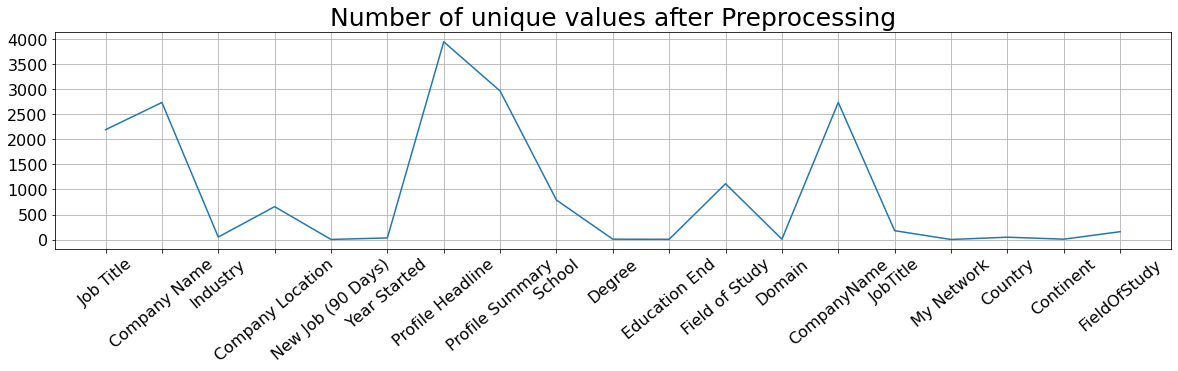

In [70]:
import matplotlib.pyplot as plt

print(df1.nunique())
plt.figure(figsize=(20,4))
plt.plot(df1.nunique())
plt.grid()
plt.title('Number of unique values after Preprocessing', fontsize = 25)
plt.xticks(fontsize=16, rotation=40)
plt.yticks(fontsize=16)
plt.show()

In [72]:
fig2 = px.treemap(df1, path=['My Network', 'Domain', 'JobTitle'], width=1000, height=1000)
fig2.show()

In [73]:
fig3 = px.treemap(df1, path=['My Network', 'Domain', 'CompanyName'], width=1000, height=1000)
fig3.show()